<a href="https://colab.research.google.com/github/Camipinto/Laboratorio-de-Programacion-Cientifica-para-Ciencia-de-Datos/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto: El Desafío de Don Rene

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesores: Matías Rojas - Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

*Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir.*


----

## Reglas

- Fecha de entrega: 13/12/2022 (Sin atrasos)
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia. 
- Pueden usar cualquier material del curso que estimen conveniente.


In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats
from IPython.display import display, Markdown, Latex

from plotly.graph_objs._figure import Figure as PlotlyFigure
from pandas.core.series import Series as PandasSeries
from pandas.api.types import is_numeric_dtype

---

## El desafio de Don Rene


Don Rene, afamado *influencer* y próximo emprendedor de IA, decide que será una buena idea darle un giro a su vida y dedicarse al rubro del asesoramiento de inversionistas en la industria de los videojuegos. 

El futuro empresario plantea que el éxito relativo de una inversión en una desarrolladora de juegos debe ser analizado desde un punto de vista basado en evidencia y no en la intuición. 
Por dicha razón, plantea que para el sería ideal que existiera una máquina que, dada las características de un nuevo videojuego (su género, el estudio que lo desarrolla, su historia, etc...), indique si este será potencialmente una inversión rentable o no.

Rene está convencido que el éxito de una inversión en videojuegos estar relacionada por dos características muy relevantes de estos una vez que salen al mercado:

**1. La potencial evaluación (Positivo, Negativo, etc...) que le den los usuarios que jugarán el juego.**

**2. Las potenciales ventas del juego.**

Si bien la idea puede sonar excelente, Don Rene carece en su totalidad de una formación en Ciencia de los Datos, por lo que decide ir en ayuda de expertos para implementar su idea.

Sin embargo, como fiel discipulo del libre mercado, decide no contratar a un equipo en particular, si no que tener la libertad de elegir entre muchos equipos que compiten entre si para saber cuál contratar. Para esto recurre a una triquiñuela recurrentemente utilizada en data science: Establecer una competencia abierta y contratar a los que cumplan mejor sus requisitos.


Para esto, Don Rene abre una competencia en la plataforma Codalab (plataforma similar a Kaggle) la cuál, espera que se replete de buenas propuestas. Los equipos que mejor evaluaciones obtengan (los primeros 5 de cada tabla) serán contratados y retribuidos con un cupón canjeable con la friolera cantidad de 1 punto bonus para el proyecto en el curso MDS7202.





### Definición Formal del Problema

El objetivo de este proyecto es relativamente sencillo, pero en extremo ambicioso: Tendrán que aplicar todo lo aprendido hasta este momento con el fin de solucionar 2 problemas distintos: 

1. **Clasificación de potenciales evaluaciones con las que los jugadores evaluarán los juegos**. Las posibles clases que deben asignar a cada juego son `('Negative', 'Mixed', 'Mostly Positive', 'Positive', 'Very Positive')`. La métrica de evaluación utilizada para medir la clasificación es `f1_weighted`.
2. **Regresión de las potenciales ventas que tendrán los juegos**. La métrica de evaluación utilizada para medir la clasificación es `r_2`.

Para esto, ustedes contarán un dataset que cuenta con diversa información de los juegos de la plataforma Steam (tales como fecha de lanzamiento, logros disponibles, plataforma, desarrollador, distribuidor, tags, etc...) más las etiquetas y valores a predecir.


El objetivo final es que participen en la competencia generada en Codalab. Una competencia de Data Science funciona generalmente de la siguiente manera: 

1. Se plantea un problema que los equipos deben resolver.
2. Se provee de datos de entrenamiento a los equipos para que generen modelos que resuelvan el problema.
3. Se provee de datos de prueba que los equipos deberán predecir con los modelos creados. Una vez predichos, los equipos deben subir los archivos a la plataforma, la cuál los evaluará y publicará en un tablero disponible para todos los participantes.

Por este motivo, se les provee de dos datasets: `train.pickle` y `test.pickle`.

- Por una parte, `train.pickle` está preparado que lo utilizen como conjunto de entrenamiento del modelo; por lo que incluye las etiquetas y valores por predecir. 

- Por otra parte, la evaluación de la competencia será hecha usando `test.pickle`. Es decir, este dataset solo contiene características de los juegos y ustedes deberán predecir tanto las potenciales evaluaciones como las posibles ventas de estos y subir sus resultados.

- Además, tendrán sample subissions, es decir, un ejemplo de como subir las evaluaciones.

Obviamente para subir archivos a la competencia deberán registrarse en Codalab. **Puden participar máximo 5 veces en la competencia** (la idea es evitar que se sobreajusten a los datos que deben predecir)

**IMPORTANTE**: Para la clasificación no usen la cantidad de ventas (target de la regresión) como atributo. Por otro lado, para la regresión no utilicen las evaluaciones como atributo para predecir. Infringir estas reglas implicará en no contar el puntaje de la competencia como tampoco poder participar de los bonus por los tops.


---

## Secciones Requeridas en el Informe

La siguiente lista detalla las secciones que debe contener su notebook para resolver el proyecto. Es importante que al momento de desarrollar cada una de las secciones, estas sean escritas en un formato tipo **informe**, donde describan detalladamente cada uno de los puntos realizados.

### 1. Introducción [0.5 Puntos]

*Esta sección es literalmente una muy breve introducción con todo lo necesario para entender que hicieron en su proyecto.*

- Describir brevemente ambos problemas planteados (clasificación y regresión).
- Describir brevemente los datos de entrada que les provee el problema.
- Describir qué métricas se ocupan para la evaluación del problema y por qué se utilizan.
- [Escribir al final] Describir brevemente el modelo que usaron para resolver el problema (incluyendo las transformaciones intermedias de datos).
- [Escribir al final] Indicar si lograron resolver el problema a través de su modelo. Indiquen además si creen que los resultados de su mejor modelo son aceptables y como les fue con respecto al resto de los equipos.

### 2. Análisis Exploratorio de Datos [1.5 Punto]


*La idea de esta sección es que exploren el dataset y obtengan una idea de como son los datos de su problema para que en la siguientes secciones, puedan modelarlos.*

- Analizar cantidad de datos nulos, tipos de datos, duplicados, distribuciones de las variables a través de histogramas.
- Generar visualizaciones de las interacciones (como por ejemplo, una scatter matrix) en las distintas variables.
- Ver las correlaciones entre las distintas variables y los valores faltantes de cada una de estas. 
- Proyectar los datos con PCA, T-SNE o UMAP para ver si existen relaciones entre las distintas variables de forma bi o tri dimensional.
- Reportar los patrones y relaciones interesantes.
- No restringirse a lo mencionado anteriormente.

### 3. Preparación de Datos [1 Punto]

*Esta sección consiste en generar los distintos pasos para preparar sus datos con el fin de luego poder crear su modelo.*

- Descartar datos nulos y outliers.
- Preprocesar datos categóricos y ordinales.
- Escalar/estandarizar datos numéricos.
- Codificar texto.
- Setear las transformaciones en un `ColumnTransformer`.
- Probar las transformaciones.

### 4. Creación de los *Baseline* [0.5 Punto]

*En esta sección crearán el modelo más básico posible que resuelva el problema. La idea de este modelo usarlo como comparación para que en el siguiente paso lo puedan mejorar.*

- Generar un pipeline para la clasificación un clasificador relativamente sencillo (a su elección).
- Generar un pipeline para la regresión con  un regresor relativamente sencillo (a su elección).
- Evaluar ambos modelos según las métricas de evaluación y reportar.

### 5. Optimización de los Modelos [1 Puntos]

*Aquí deberán mejorar los modelos al variar los hiperparámetros que están ocupando. No se les pide 100% de nada, si se va a demorar la edad del universo en explorar su grilla, entonces achíquenla a algo que sepan que va a terminar.*

- Usar **`HalvingGridSearchCV`** para tunear hipermarámetros.
- Agregar técnicas de reduccion de dimensionalidad como `PCA` o de seleccion de atributos, como también usar mejores clasificadores y explorar sus hiperparámetros. 
- Probar distintos parámetros para las transformaciones de datos, seleccion de atributos, clasificadores, etc...
- Probar modelos basados en gradient boosting/bagging.  
- Probar activando/descativando los procesadores de texto, de categorías, etc...
- Recuerden setear la búsqueda para optimizar la métrica que se evalua en la competencia.

- **Generen grillas decentes que terminen ojalá antes que cierre el curso.**
    
### 6. Concluir [0.5 Punto] 


*Aquí deben escribir una breve conclusión del trabajo que hicieron en donde incluyan (pero no se limiten) a responder las siguientes preguntas:*

- ¿Pudieron resolver exitosamente el problema?
- ¿Son aceptables los resultados obtenidos?
- ¿Como fue el rendimiento del baseline?
- ¿Pudieron optimizar el baseline?
- ¿Que tanto mejoro el baseline con respecto a sus optimizaciones?
- ¿Estuvieron conformes con sus resultados?
- ¿Creen que hayan mejores formas de modelar el problema?
- ¿Es didáctico usar una competencia?
- ¿En general, qué aprendieron del proyecto?¿Qué no aprendieron y les gustaría haber aprendido?
- Etc...


### 7. Punto por superar el baseline de la competencia. [1 Punto]

*Este punto es solo informativo, no deben escribir nada aquí*

---

## Esquema de la Tarea


Pueden usar el siguiente esquema para organizar la tarea (y borrar todo lo anterior).
Obviamente **no deben limitarse a lo que está escrito en esta**: puede incrementar en caso de más técnicas y obviar algunas partes en caso que alguna y otro punto no aplique a su problema.

Pueden borrar las instrucciones anteriores y quedarse solo con lo que viene a continuación.


---
---
<br>

<br>

<br>



# Proyecto

### Equipo:

- \<Primer integrante\>
- \<Segundo integrante\>

- \<Nombre de usuarios en Codalab\>

- \<Nombre del Equipo en Codalab\>

### Link de repositorio de GitHub: `\<http://....\>`




## 1. Introducción

El objetivo de este proyecto consiste en ...

Los datos que proveen es un dataset con X ejemplos que describen una observación de ... 
Son N atributos y la variables objetivos son de tipo ... y ...

La primera tarea se evalua en base a la métrica ... ya que esta permite medir ...

Nuestra propuesta para resolver el problema consistieron en modelo basado en...

Nuestro modelo cumplió/no cumplió las expectativas...

In [3]:
!pip3 install pickle5
import pickle5 as pickle
with open('train.pickle', "rb") as fh:
  df_train = pickle.load(fh)
with open('test.pickle', "rb") as fh:
  df_test = pickle.load(fh)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---
## 2. Análisis Exploratorio de Datos

In [46]:
df_train

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,tags,achievements,average_playtime,price,short_description,estimated_sells,rating
0,An Aspie Life,2018-03-29,1,Bradley Hennessey;Joe Watson,EnderLost Studios,windows,0,Single-player;Steam Achievements,Adventure;Casual;Free to Play;Indie;Simulation,Free to Play;Adventure;Indie,23,0,0.00,One day your roommate Leaves for no reason. Yo...,3914,Mixed
1,GhostControl Inc.,2014-06-06,1,bumblebee,Application Systems Heidelberg,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie;Simulation;Strategy,Turn-Based;Indie;Simulation,53,65,10.99,Manage a team of ghosthunters and free London ...,10728,Mixed
2,Deponia,2012-08-06,1,Daedalic Entertainment,Daedalic Entertainment,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Indie,Adventure;Point & Click;Comedy,19,217,6.99,"In Deponia, the world has degenerated into a v...",635792,Positive
3,Atlas Reactor,2016-10-04,1,Trion Worlds,Trion Worlds,windows,0,Multi-player;Online Multi-Player;Steam Achieve...,Free to Play;Strategy,Free to Play;Multiplayer;Strategy,121,1240,0.00,SEASON 6 NOW LIVE! The battle for Atlas contin...,253864,Positive
4,CHUCHEL,2018-03-07,1,Amanita Design,Amanita Design,windows;mac,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Indie,Adventure;Indie;Casual,7,245,7.99,CHUCHEL is a comedy adventure game from the cr...,49818,Mostly Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7876,KOEWOTAYORINI / 声之寄托,2018-03-26,0,あみそ組,Pujia8 Studio;Gamera Game,windows,0,Single-player;Steam Achievements;Steam Cloud,Adventure;Free to Play;Indie;RPG,Free to Play;Adventure;Anime,20,65,0.00,“喂喂，求求你啦！救救我！” ——你接到这样一个电话 发出这样的求救，给你打电话的人，是一名...,24130,Positive
7877,Montaro,2016-07-25,1,JCKSLAP,MBDL,windows,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie,Memes;Cute;Casual,15,174,0.79,Montaro is a DOGE.,550368,Very Positive
7878,Moe Jigsaw,2018-03-23,1,ARES Inc.,ARES Inc.,windows,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie,Casual;Nudity;Indie,72,0,2.89,&quot;Moe Jigsaw&quot; is the definitive versi...,10906,Mostly Positive
7879,Drunkn Bar Fight,2016-11-28,1,The Munky,The Munky,windows,0,Single-player;Multi-player;Online Multi-Player...,Action;Indie;Early Access,Early Access;Action;Indie,0,0,10.99,"VR PARTY GAMEDrunkn Bar Fight is a simple, imm...",18876,Mostly Positive


In [5]:
correlations = df_train.corr()
correlations

,english,required_age,achievements,average_playtime,price,estimated_sells
english,1.000000,0.015799,0.009748,-0.007678,0.018056,0.014292
required_age,0.015799,1.000000,-0.001500,0.026692,0.157875,0.110789
achievements,0.009748,-0.001500,1.000000,0.000825,-0.026374,0.022180
average_playtime,-0.007678,0.026692,0.000825,1.000000,0.045651,0.161612
price,0.018056,0.157875,-0.026374,0.045651,1.000000,0.062935
estimated_sells,0.014292,0.110789,0.022180,0.161612,0.062935,1.000000


AttributeError: ignored

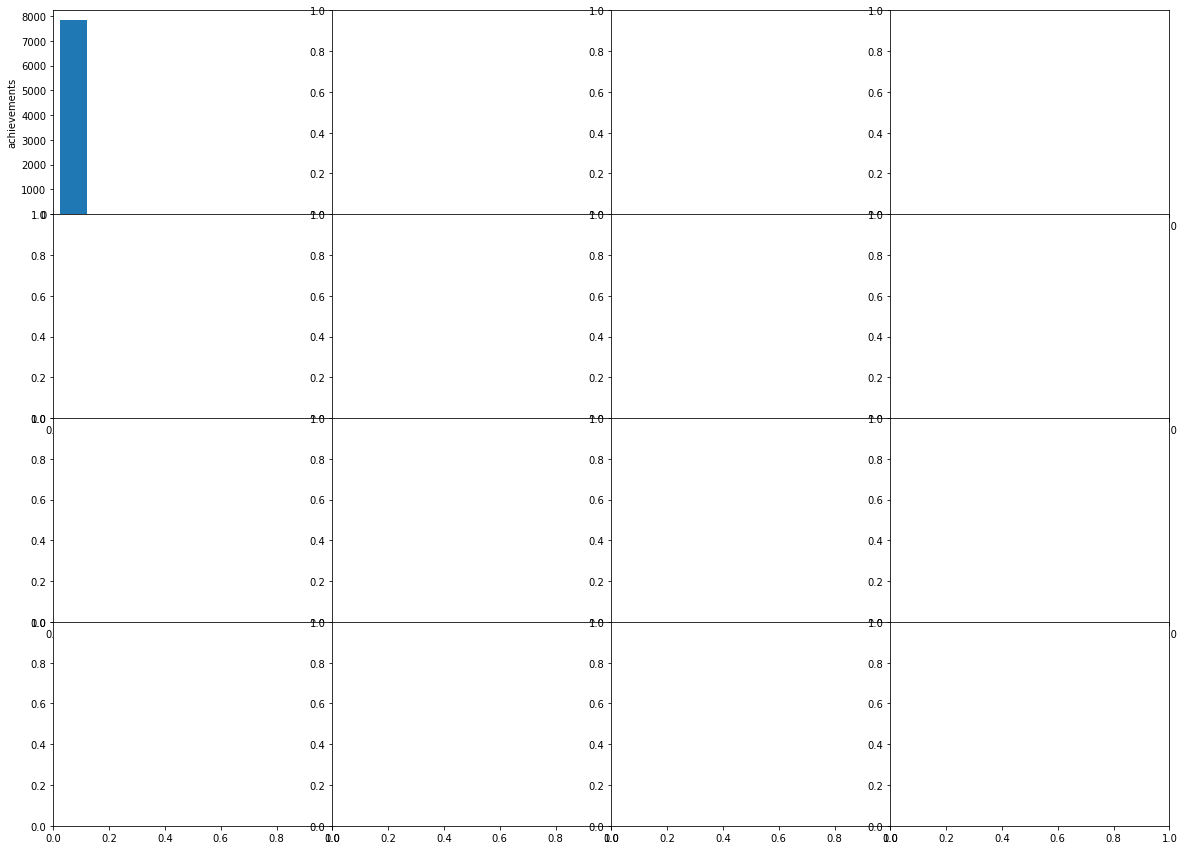

In [59]:
pd.plotting.scatter_matrix(df_train[['achievements','average_playtime','price','estimated_sells']], alpha=1, figsize= (20,15), grid=True)

En primer lugar se evalúa la relación entre las variables numéricas. 
Como se ve en la matriz de correlación y en la matriz de scatter, no hay variables que por sí solas estén significativamente correlacionadas con otras.

In [58]:
px.scatter(df_train, x= df_train['release_date'], y = df_train['estimated_sells'], log_y = True)

In [10]:
fig = px.box(df_train, y='price', color='rating')
fig.show()

In [40]:
fig = px.box(df_train, y='rating', color='required_age', )
fig.show()

In [47]:
fig = px.box(df_train, y='release_date', color='rating', facet_col = 'english')
fig.show()



Al efectuar el análisis exploratorio de datos pudimos notar lo siguiente:

El atributo A tenía X datos nulos y Y duplicados... que podrían potencialmente dificultar el análisis.

La variable A se distribuye de forma normal. En cambio la B en forma exponencial. La variable C es categórica.

Los atributos A y B interactúan de P forma, mientras que los C y D de Q forma...

Los atributos A y C se correlacionan con las variables de salida Y de forma creciente... B no tiene correlación con la salida.

Además, encontramos que al proyectar en 2D ...

...

---

## 3. Preparación de Datos

Para preparar nuestros datos, primero eliminamos duplicados y outliers...:

In [45]:
clean_df = df_train.drop(['name','english','required_age','developer','publisher'], axis=1)
clean_df

,release_date,platforms,categories,genres,tags,achievements,average_playtime,price,short_description,estimated_sells,rating
0,2018-03-29,windows,Single-player;Steam Achievements,Adventure;Casual;Free to Play;Indie;Simulation,Free to Play;Adventure;Indie,23,0,0.00,One day your roommate Leaves for no reason. Yo...,3914,Mixed
1,2014-06-06,windows;mac;linux,Single-player;Steam Achievements;Steam Trading...,Casual;Indie;Simulation;Strategy,Turn-Based;Indie;Simulation,53,65,10.99,Manage a team of ghosthunters and free London ...,10728,Mixed
2,2012-08-06,windows;mac;linux,Single-player;Steam Achievements;Steam Trading...,Adventure;Indie,Adventure;Point & Click;Comedy,19,217,6.99,"In Deponia, the world has degenerated into a v...",635792,Positive
3,2016-10-04,windows,Multi-player;Online Multi-Player;Steam Achieve...,Free to Play;Strategy,Free to Play;Multiplayer;Strategy,121,1240,0.00,SEASON 6 NOW LIVE! The battle for Atlas contin...,253864,Positive
4,2018-03-07,windows;mac,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Indie,Adventure;Indie;Casual,7,245,7.99,CHUCHEL is a comedy adventure game from the cr...,49818,Mostly Positive
...,...,...,...,...,...,...,...,...,...,...,...
7876,2018-03-26,windows,Single-player;Steam Achievements;Steam Cloud,Adventure;Free to Play;Indie;RPG,Free to Play;Adventure;Anime,20,65,0.00,“喂喂，求求你啦！救救我！” ——你接到这样一个电话 发出这样的求救，给你打电话的人，是一名...,24130,Positive
7877,2016-07-25,windows,Single-player;Steam Achievements;Steam Trading...,Casual;Indie,Memes;Cute;Casual,15,174,0.79,Montaro is a DOGE.,550368,Very Positive
7878,2018-03-23,windows,Single-player;Steam Achievements;Steam Trading...,Casual;Indie,Casual;Nudity;Indie,72,0,2.89,&quot;Moe Jigsaw&quot; is the definitive versi...,10906,Mostly Positive
7879,2016-11-28,windows,Single-player;Multi-player;Online Multi-Player...,Action;Indie;Early Access,Early Access;Action;Indie,0,0,10.99,"VR PARTY GAMEDrunkn Bar Fight is a simple, imm...",18876,Mostly Positive


In [12]:
## Código

Después, imputamos ciertos datos

In [13]:
## Código

Luego, preparamos un `ColumnTransformer` que prepara los datos:

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

ohe_variables = df_train[[]]
num_variables = df_train[['achievements','average_playtime','price','estimated_sells']]

scaler = RobustScaler()

df_scaled = scaler.fit_transform(num_variables.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'achievements','average_playtime','price','estimated_sells'])
 
print("Scaled Dataset Using RobustScaler")
df_scaled.head()

Scaled Dataset Using RobustScaler


,achievements,average_playtime,price,estimated_sells
0,0.228571,-0.107570,-0.743617,-0.275556
1,1.085714,0.151394,0.425532,-0.168836
2,0.114286,0.756972,0.000000,9.620887
3,3.028571,4.832669,-0.743617,3.639149
4,-0.228571,0.868526,0.106383,0.443390


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f846c71bfd0>,
      dtype=object)

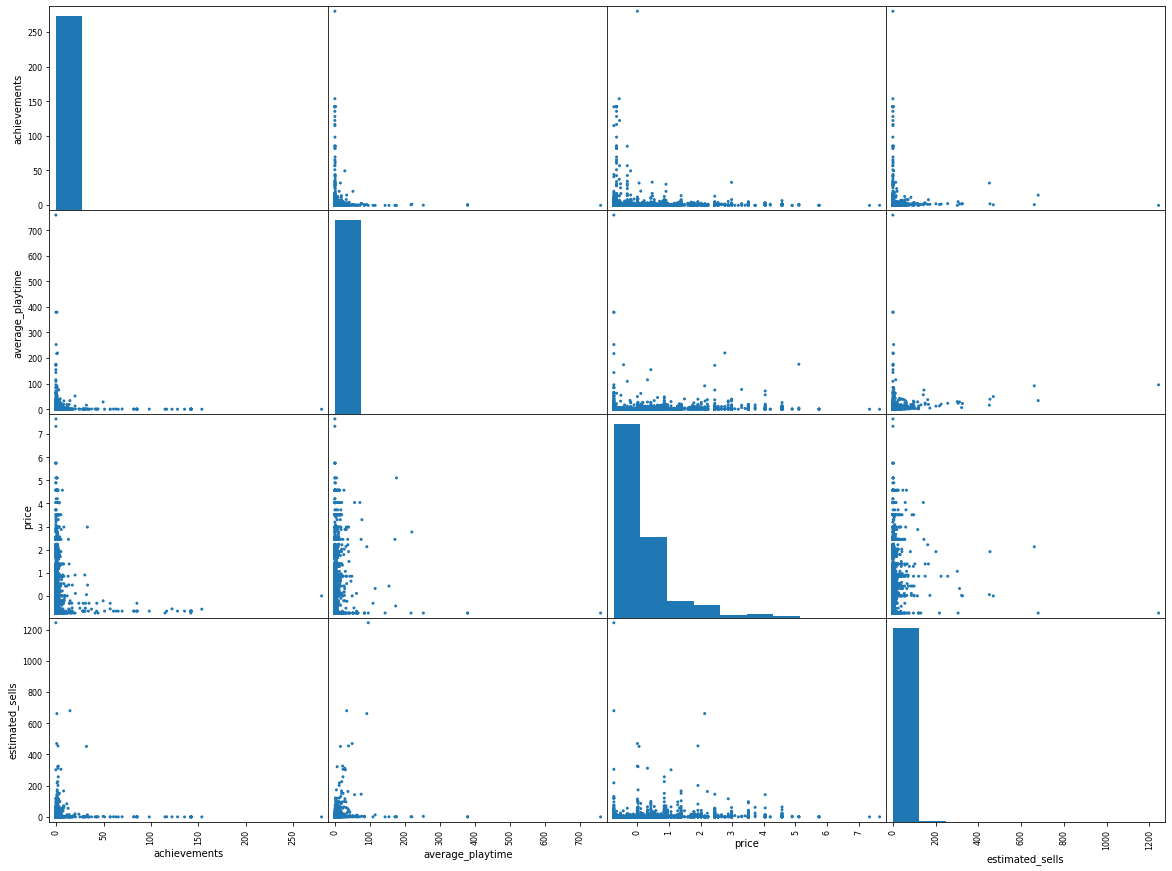

In [26]:
pd.plotting.scatter_matrix(df_scaled, alpha=1, figsize= (20,15), grid=True)

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from typing import List
from sklearn.preprocessing import OneHotEncoder

#ohe_variables = df_train[['']]
re_variables: List[str] = ['achievements','average_playtime','price','estimated_sells']
 
column_transformer: ColumnTransformer = ColumnTransformer(transformers=[
   # ('OneHotEncoder', OneHotEncoder(), ohe_variables),
    ('MinMax', MinMaxScaler(), re_variables)
])

...

---

## 4. Baseline

Adjuntamos las transformaciones anteriores en un solo `Pipeline` y agregamos al final un clasificador sencillo `ClasificadorX` 


In [32]:
from sklearn.linear_model import SGDClassifier
from sklearn import svm

pipeline_clf: Pipeline = Pipeline([
    ('preprocessing', column_transformer_clf),
    ('KNC', svm())
])

pipeline_rg: Pipeline = Pipeline([
    ('preprocessing', column_transformer_rg),
    ('KNC', svm())
])

# Evalauación
# classfication_report(...)

---

## 5. Optimización del Modelo

Ahora, agregamos selección y/o reducción de atributos y probaremos una combinación de diferentes parámetros para mejorar nuestro modelo:


*Nota*: Procuren hacer Gridsearch sobre espacios de búsqueda razonables. Es decir, no estén 3 días buscando la mejor configuración...

In [16]:
# grilla_parametros = [{'seleccion': SelectPercentile , 'percentile': [25, 50, 75], 'clf': clf_1}, 
#                      {'clf': clf_2, 'steps'; n},
#                      {...}, 
#                     ]
# gs_2 = HalvingGridSearchCV(pipeline_clf, grilla_parametros, metric='la_metrica_que_optimiza_el_problema')

Pudimos ver que mejor modelo mejora/no mejora los resultados obtenidos en el baseline.

In [17]:
# gs_2.best_...

---

## 6. Conclusiones

Algunas respuestas que podrían plantearse pueden ser:

- ¿Pudieron resolver exitosamente el problema?
- ¿Son aceptables los resultados obtenidos?


- ¿Como fue el rendimiento del baseline?
- ¿Pudieron optimizar el baseline?
- ¿Que tanto mejoro el baseline con respecto a sus optimizaciones?


- ¿Estuvieron conformes con sus resultados?
- ¿Creen que hayan mejores formas de modelar el problema?
- ¿Creen que fue buena idea usar una competencia de por medio?
- ¿En general, qué aprendieron en el pryecto?¿Qué no aprendieron y les gustaría haber aprendido?
- Etc...

**OJO** si usted decide responder parte de estas preguntas, debe redactarlas en un formato de informe y no responderlas directamente.

---

<br>

### Anexo: Generación de Archivo Submit de la Competencia

Para subir los resultados obtenidos a la pagina de CodaLab utilice la función `generateFiles` entregada mas abajo. Esto es debido a que usted deberá generar archivos que respeten extrictamente el formato de CodaLab, de lo contario los resultados no se veran reflejados en la pagina de la competencia.

Para los resultados obtenidos en su modelo de clasificación y regresión, estos serán guardados en un archivo zip que contenga los archivos `predicctions_clf.txt` para la clasificación y `predicctions_rgr.clf` para la regresión. Los resultados, como se comento antes, deberan ser obtenidos en base al dataset `test.pickle` y en cada una de las lineas deberan presentar las predicciones realizadas.

Ejemplos de archivos:

- [ ] `predicctions_clf.txt`

        Mostly Positive
        Mostly Positive
        Negative
        Positive
        Negative
        Positive
        ...

- [ ] `predicctions_rgr.txt`

        16103.58
        16103.58
        16041.89
        9328.62
        107976.03
        194374.08
        ...



In [18]:
from zipfile import ZipFile
import os

def generateFiles(predict_data, clf_pipe, rgr_pipe):
    """Genera los archivos a subir en CodaLab

    Input
    predict_data: Dataframe con los datos de entrada a predecir
    clf_pipe: pipeline del clf
    rgr_pipe: pipeline del rgr

    Ouput
    archivo de txt
    """
    y_pred_clf = clf_pipe.predict(predict_data)
    y_pred_rgr = rgr_pipe.predict(predict_data)
    
    with open('./predictions_clf.txt', 'w') as f:
        for item in y_pred_clf:
            f.write("%s\n" % item)

    with open('./predictions_rgr.txt', 'w') as f:
        for item in y_pred_rgr:
            f.write("%s\n" % item)

    with ZipFile('predictions.zip', 'w') as zipObj2:
       zipObj2.write('predictions_rgr.txt')
       zipObj2.write('predictions_clf.txt')

    os.remove("predictions_rgr.txt")
    os.remove("predictions_clf.txt")